<a href="https://colab.research.google.com/github/jirapat-tho/my-work/blob/main/Deep_learning_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tensor:


*   Similar to array
*   Building block of neural networks



Load from list

In [ ]:
import torch
lst = [[1,2,3], [4,5,6]]
tensor = torch.tensor(lst)
print(tensor)
tensor.shape
tensor.dtype
tensor.device

tensor([[1, 2, 3],
        [4, 5, 6]])


device(type='cpu')

Load form Numpy array

In [ ]:
import numpy as np
array = np.array([[1,2,3], [4,5,6]])
np_array = np.array(array)
np_tensor = torch.from_numpy(np_array)
print(np_tensor)

tensor([[1, 2, 3],
        [4, 5, 6]])


In [ ]:
import torch.nn as nn

In [ ]:
## Create input_tensor with three features
input_tensor = torch.tensor(
    [[0.3471, 0.4547,-0.2356]]
    )

In [ ]:
# Define our first linear layer
#ชั้น Linear ทำการคำนวณโดยใช้ weight matrix และ bias vector เพื่อแปลงข้อมูลจาก 3 features เป็น 2 features
linear_layer = nn.Linear(
                         in_features=3,
                         out_features=2
                         )

In [ ]:
# Pass input through linear layer
output = linear_layer(input_tensor)
print(output)

tensor([[0.6707, 0.4727]], grad_fn=<AddmmBackward0>)


In [ ]:
linear_layer.weight

Parameter containing:
tensor([[ 0.5548,  0.2572,  0.4867],
        [ 0.5091,  0.2675, -0.5269]], requires_grad=True)

In [ ]:
linear_layer.bias

Parameter containing:
tensor([0.4758, 0.0502], requires_grad=True)

In [ ]:
# Create network with three linear layers
model = nn.Sequential(
    nn.Linear(10,18),
    nn.Linear(18,20),
    nn.Linear(20,5)
)
# Input is passed thoroght the linear layers
# Input 10 -> output 18 -> output 20 -> Output 5

In [ ]:
input_tensor = torch.tensor(
    [[-0.0014, 0.4038,1.0305,0.7521,0.7489,-0.3968,0.0113,-1.3844,0.8705,-0.9743]]
    )

In [ ]:
print(input_tensor)

tensor([[-0.0014,  0.4038,  1.0305,  0.7521,  0.7489, -0.3968,  0.0113, -1.3844,
          0.8705, -0.9743]])


In [ ]:
output_tensor = model(input_tensor)
print(output_tensor)

tensor([[-0.0347, -0.0637,  0.1840, -0.0552, -0.0551]],
       grad_fn=<AddmmBackward0>)




*   Output is still not yet meaningful



# Meet the sigmoid function

In [ ]:
import torch
import torch.nn as nn

input_tensor = torch.tensor([[6.0]])
sigmoid = nn.Sigmoid()
output = sigmoid(input_tensor)
print(output)

tensor([[0.9975]])


Activation fucntion as the last layer

In [ ]:
model = nn.Sequential(
    nn.Linear(6,4),  # First linear layer
    nn.Linear(4,1),  # Second linear layer
    nn.Sigmoid()
)

Getting acquainted with softmax

In [ ]:
input_tensor = torch.tensor(
    [[4.3, 6.1, 2.3]])

# Apply softmax along the last dimention
probabilities = nn.Softmax(dim=-1)           # dim=-1 : indicates softmax is applied to the input tensor's last dimension, nn.Softmax: can be used as last step in nn.Sequential()
output_tensor = probabilities(input_tensor)
print(output_tensor)

tensor([[0.1392, 0.8420, 0.0188]])


#Simple Neural Network

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower) -->
  # Hidden Layer1 (number of neurous) --->
  # H2 (n)
  # --> output (3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [ ]:
# Pick a manual seed for randomization
torch.manual_seed(32)
# Create an instance of model
model = Model()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [ ]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
my_df['variety'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [ ]:
# change last column from strings to integers
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)

<ipython-input-6-969c8dc9e6bb>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)


In [ ]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
# Train Test Split! Set x,y
X = my_df.drop('variety', axis=1)
y = my_df['variety']

In [ ]:
# Convert these to numpy arrays
X = X.values
y = y.values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [ ]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
# Set the criterion of model to measure the error, how far off the predictions are from
criterion = nn.CrossEntropyLoss()
# Choose Adam  Optimizer, lr = learning rate (if error doesn't go domn sfter a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
# Train our model
# Epochs? (one run thtu all the training data in our network)
epoch = 100
losses = []
for i in range(epoch):
  # Go forward and get a prediction
  y_pred = model.forward(X_train)  # Get predicted results

  # Measure the loss/ error, gonna be high at first
  loss = criterion(y_pred, y_train) #predicted values vs the y_train

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 ==0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 and loss: 1.1699321269989014
Epoch: 10 and loss: 0.9570867419242859
Epoch: 20 and loss: 0.7980871796607971
Epoch: 30 and loss: 0.6327950358390808
Epoch: 40 and loss: 0.43861737847328186
Epoch: 50 and loss: 0.2904532253742218
Epoch: 60 and loss: 0.1778070330619812
Epoch: 70 and loss: 0.11584122478961945
Epoch: 80 and loss: 0.0893637090921402
Epoch: 90 and loss: 0.077529177069664


Text(0.5, 0, 'Epoch')

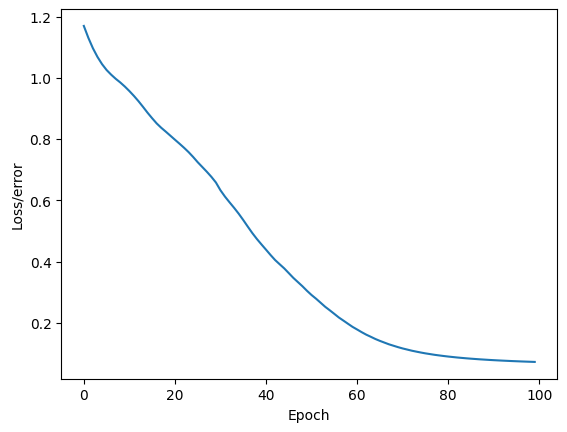

In [ ]:
# Graph it out!
plt.plot(range(epoch), losses)
plt.ylabel('Loss/error')
plt.xlabel('Epoch')

# Evaluate Test Data Set On Network

In [ ]:
# (validation model on test set)
with torch.no_grad():  # Basically trun off back propogation
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

In [ ]:
loss

tensor(0.0538)

In [ ]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = "Versicolor"
    else:
      x = "Virginica"

    # Will tell us what type of flower class our network thinks it is
    print(f' {i+1}.) {str(y_val)} \t {x} \t {x}')  # {y_test[i]} -> 0, 1, 2 | y_val.argmax().item()

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

      if y_test[i] == 0:
       x = "Setosa"
      elif y_test[i] == 1:
       x = "Versicolor"
      else:
       x = "Virginica"

print(f'We got {correct} correct!')

 1.) tensor([-3.3646,  3.9392,  0.3720]) 	 Versicolor 	 Versicolor
 2.) tensor([  7.5572,   1.1015, -11.3347]) 	 Setosa 	 Setosa
 3.) tensor([  6.5956,   1.5027, -10.4091]) 	 Setosa 	 Setosa
 4.) tensor([-3.3331,  4.2594,  0.0623]) 	 Versicolor 	 Versicolor
 5.) tensor([-7.3782,  2.8087,  5.1605]) 	 Virginica 	 Virginica
 6.) tensor([-7.3760,  3.9013,  4.2826]) 	 Virginica 	 Virginica
 7.) tensor([  6.1971,   1.6470, -10.0047]) 	 Setosa 	 Setosa
 8.) tensor([  6.6383,   1.4348, -10.4031]) 	 Setosa 	 Setosa
 9.) tensor([-2.6753,  4.3091, -0.6392]) 	 Versicolor 	 Versicolor
 10.) tensor([  7.1875,   1.3812, -11.0965]) 	 Setosa 	 Setosa
 11.) tensor([-3.8318,  4.4027,  0.5246]) 	 Versicolor 	 Versicolor
 12.) tensor([-8.6807,  1.9994,  6.8923]) 	 Virginica 	 Virginica
 13.) tensor([-2.0678,  3.8200, -0.7571]) 	 Versicolor 	 Versicolor
 14.) tensor([-1.0768,  4.3741, -2.2838]) 	 Versicolor 	 Versicolor
 15.) tensor([-7.4965,  2.6207,  5.3287]) 	 Virginica 	 Virginica
 16.) tensor([-8.6136,

# Evaluate New Data On The Network

In [ ]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [ ]:
with torch.no_grad():
  print(model.forward(new_iris))

tensor([  6.8839,   1.2461, -10.5586])


In [ ]:
newer_iris = torch.tensor([5.9, 1.0, 5.1, 1.0])

In [ ]:
with torch.no_grad():
  print(model.forward(newer_iris))

tensor([-8.3064,  2.0770,  6.5995])


In [ ]:
# Save our NN Model
torch.save(model.state_dict(), 'my_realliy_awesome_iris_model.pt')

In [ ]:
# Load the Saved Model
new_model = Model()
new_model.load_state_dict(torch.load('my_realliy_awesome_iris_model.pt'))

<ipython-input-41-af4a1ed9f195>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('my_realliy_awesome_iris_model.pt'))


<All keys matched successfully>

In [ ]:
# Make sure ot loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)